✅ Datasets Loaded Successfully
Cleaned Dataset Shape: (12316, 15)
Columns: ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

🧼 Missing Values:
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

🛠 Data Types:
Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relati

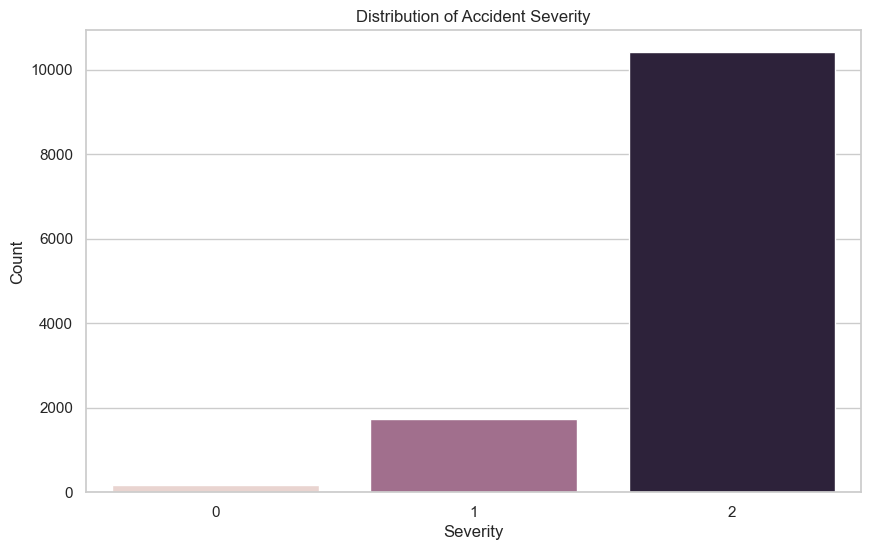

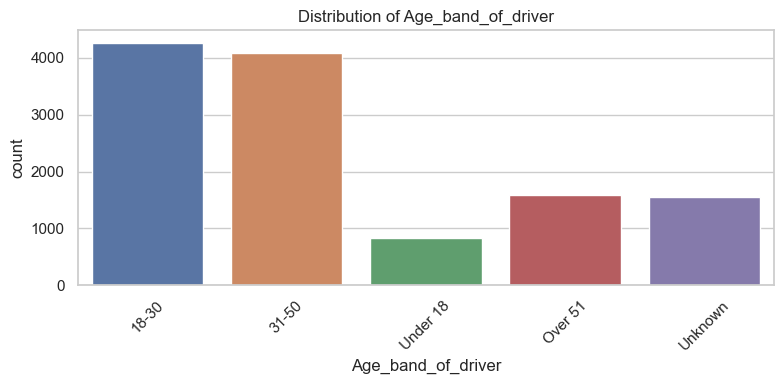

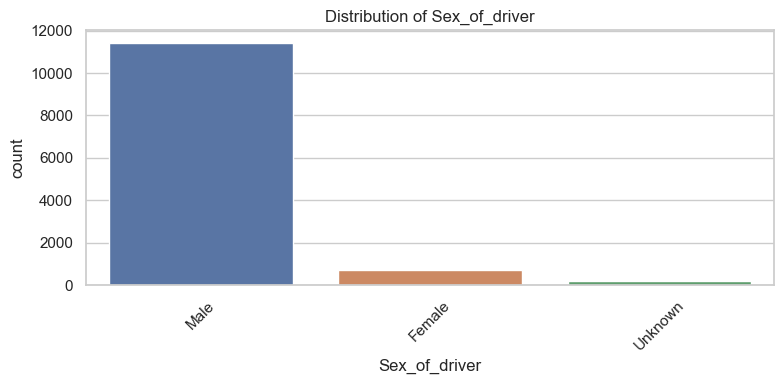

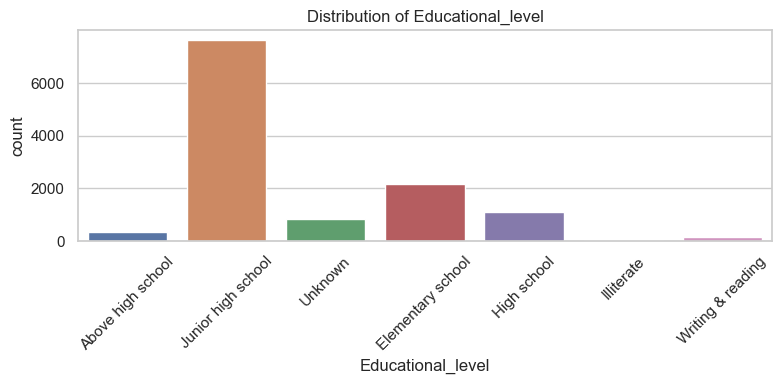

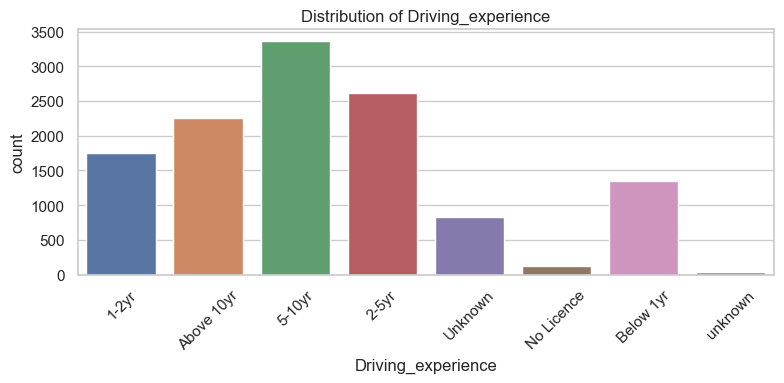

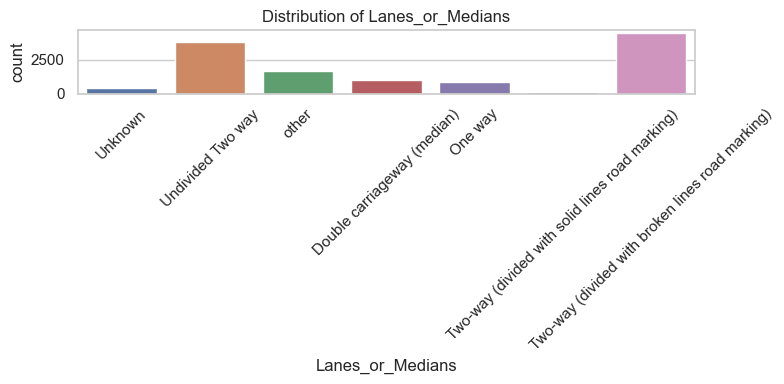

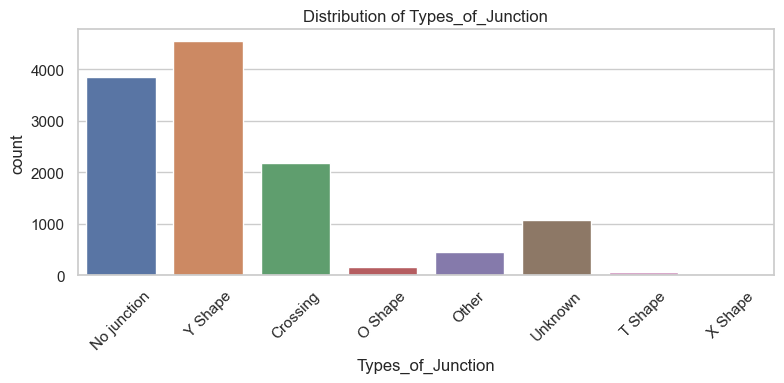

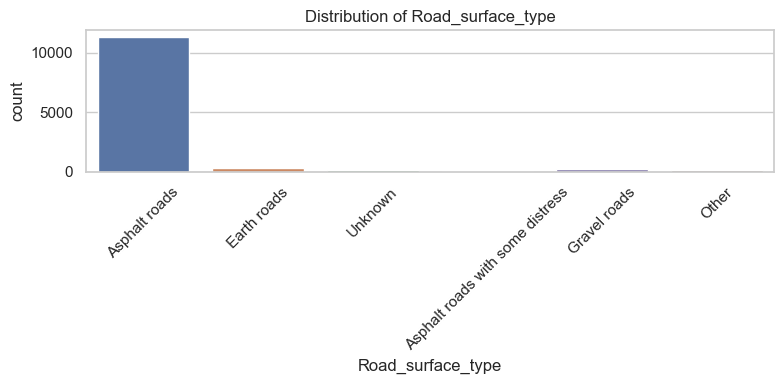

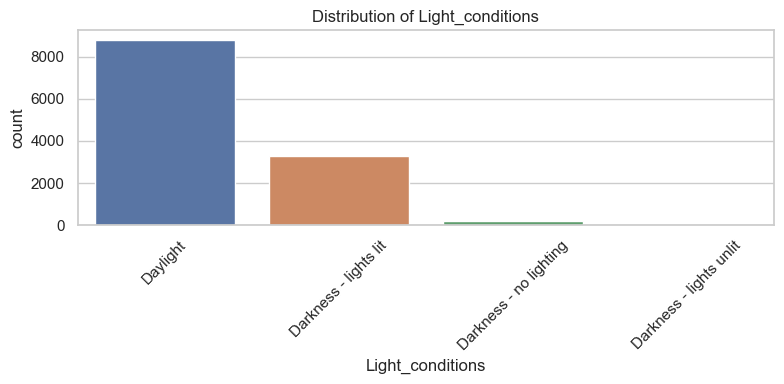

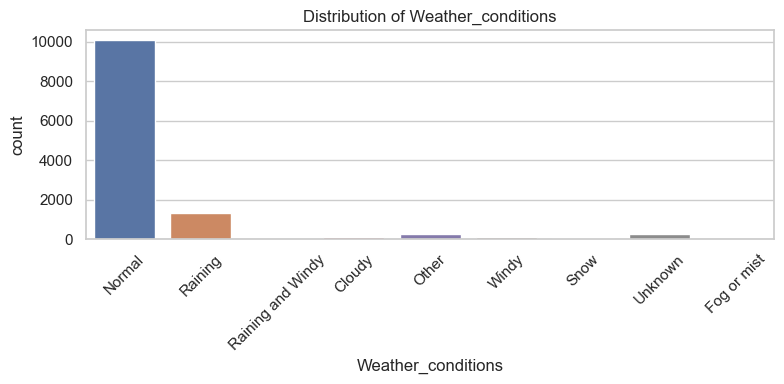

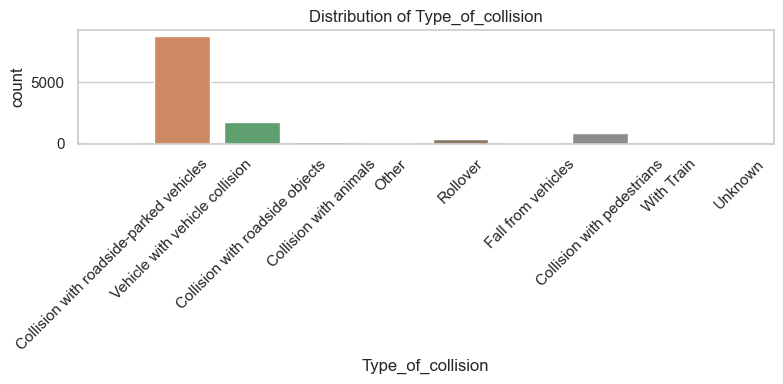

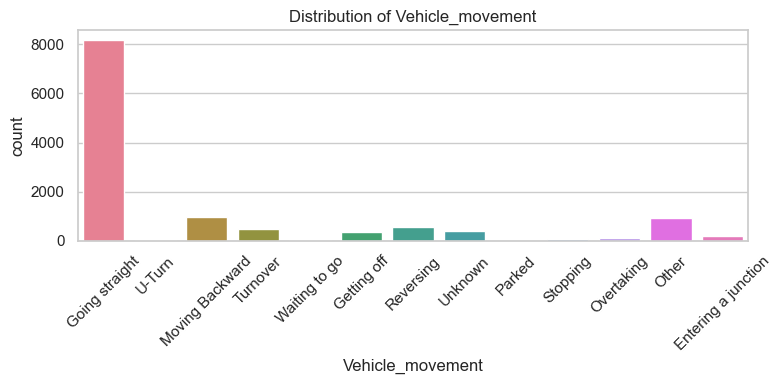

/var/folders/md/6xhsz67x5pdcr7m0x51_8v5w0000gn/T/ipykernel_50891/4157383818.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


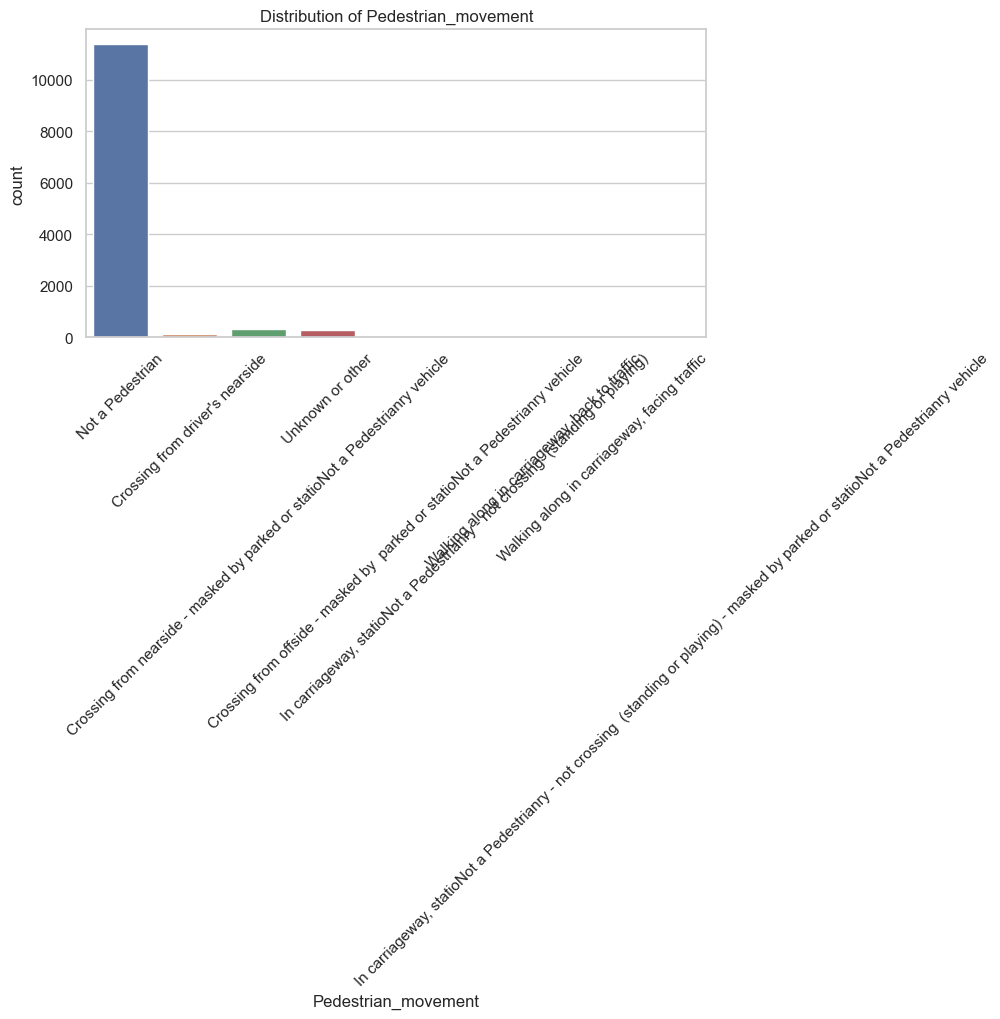

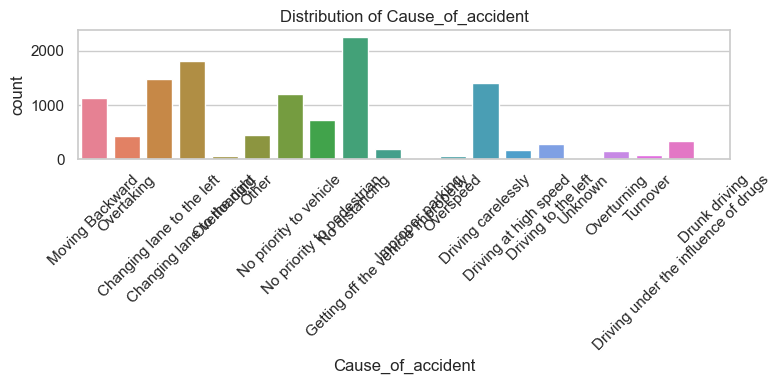

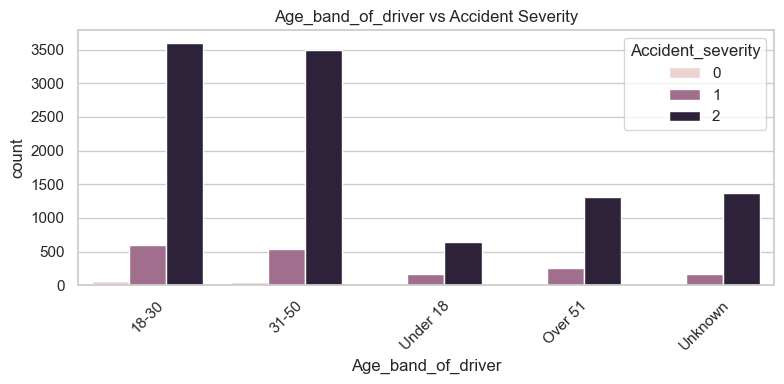

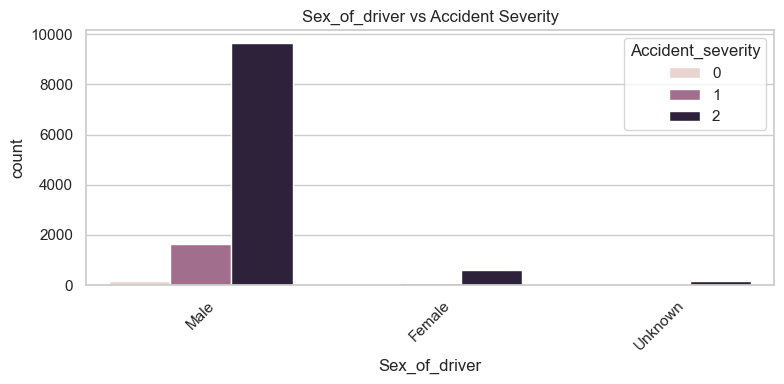

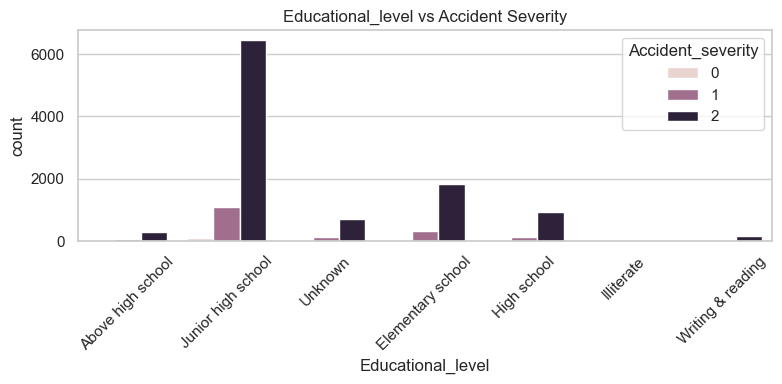

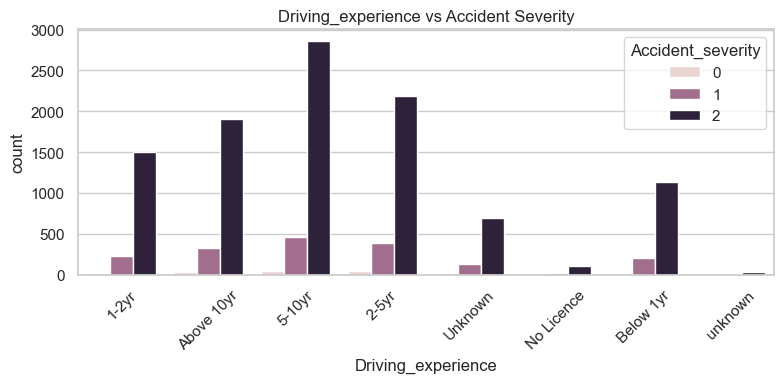

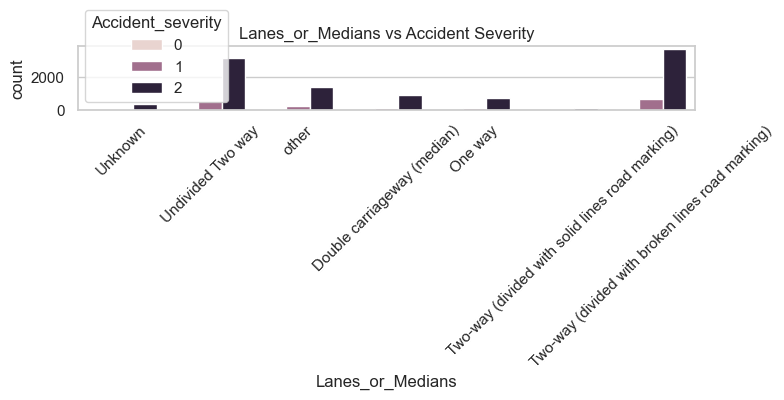

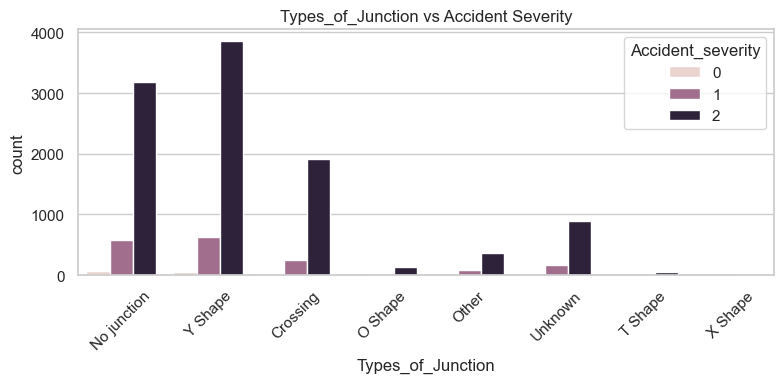

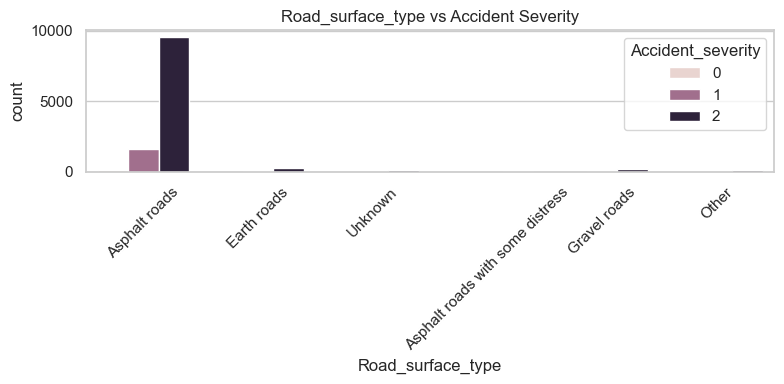

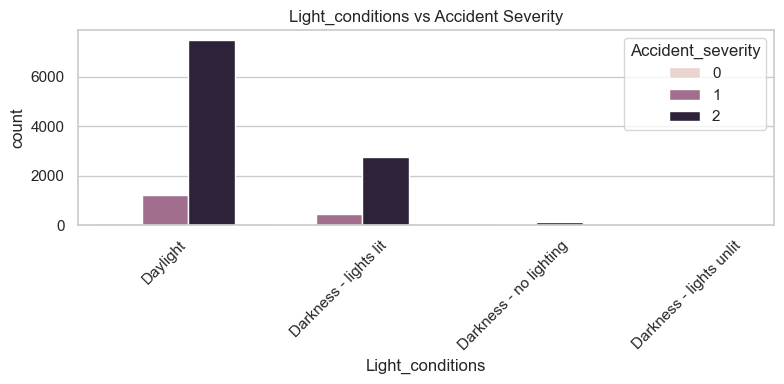

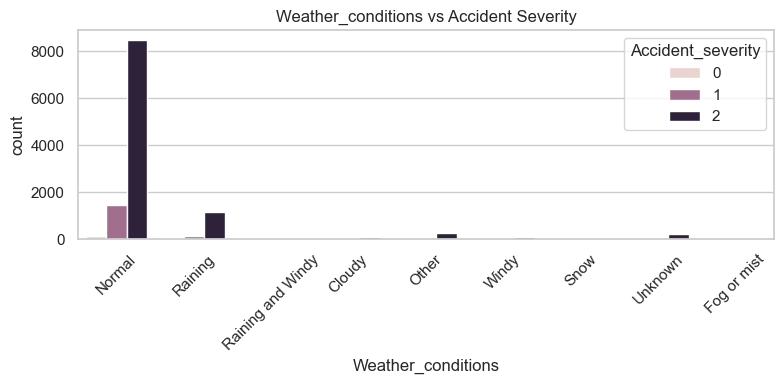

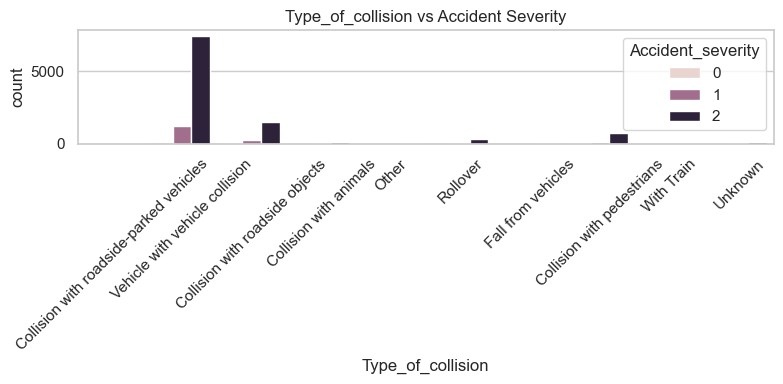

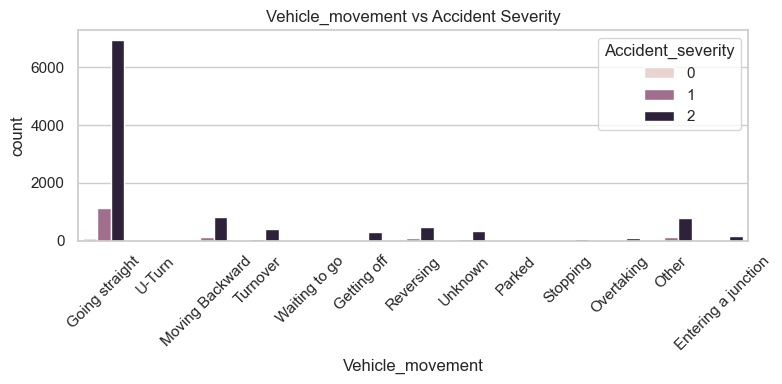

/var/folders/md/6xhsz67x5pdcr7m0x51_8v5w0000gn/T/ipykernel_50891/4157383818.py:73: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


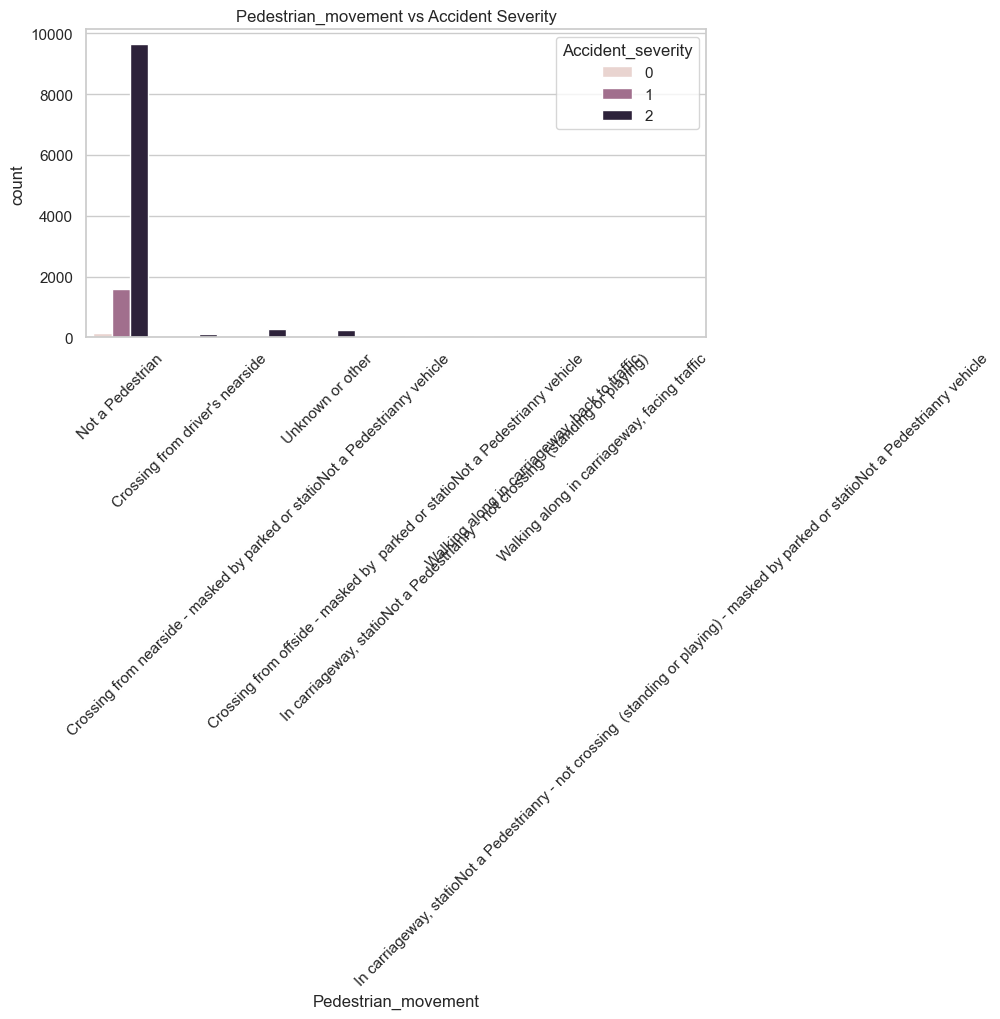

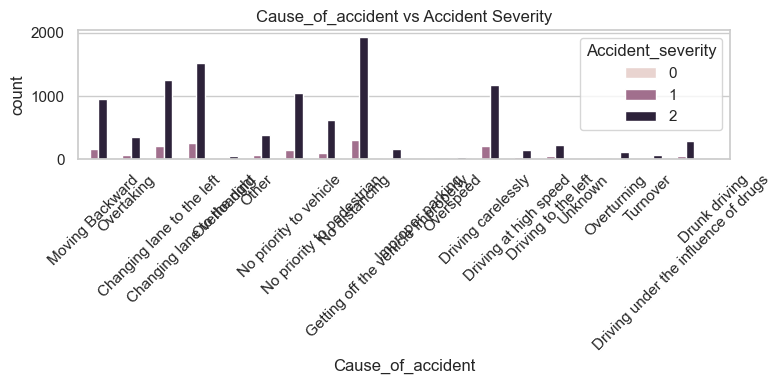

⚠️ No numerical columns found for correlation analysis.


In [3]:
# Week 2 - Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
clean_df = pd.read_csv('../data/cleaned.csv')
raw_df = pd.read_csv('../data/rta.csv')

print("✅ Datasets Loaded Successfully")

# ---- Basic Overview ----
print("Cleaned Dataset Shape:", clean_df.shape)
print("Columns:", clean_df.columns.tolist())

# ---- Check for Missing Data ----
print("\n🧼 Missing Values:")
print(clean_df.isnull().sum())

# ---- Data Types ----
print("\n🛠 Data Types:")
print(clean_df.dtypes)

# ---- Unique Value Count per Column ----
print("\n🔎 Unique Values per Column:")
print(clean_df.nunique())

# ---- Target Variable Distribution ----
print("\n🎯 Target Variable Distribution - Accident_severity")
severity_counts = clean_df['Accident_severity'].value_counts()
severity_pct = severity_counts / severity_counts.sum() * 100
print(severity_pct)

# Bar plot of target variable
sns.countplot(data=clean_df, x='Accident_severity', hue='Accident_severity', legend=False)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# ---- Univariate Analysis of Categorical Features ----
categorical_cols = [
    'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction',
    'Road_surface_type', 'Light_conditions', 'Weather_conditions',
    'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement',
    'Cause_of_accident'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=clean_df, x=col, hue=col, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    try:
        plt.tight_layout()
    except:
        plt.subplots_adjust(bottom=0.25)
    plt.show()

# ---- Bivariate Analysis with Target ----
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=clean_df, x=col, hue='Accident_severity')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Accident Severity')
    try:
        plt.tight_layout()
    except:
        plt.subplots_adjust(bottom=0.25)
    plt.show()

# ---- Correlation Heatmap (if any numerical columns exist) ----
numerical_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 6))
    corr = clean_df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.show()
else:
    print("⚠️ No numerical columns found for correlation analysis.")